In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

## **Import and Review Data**

In [6]:
data = pd.read_csv('Advertising.csv')

In [7]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,200.0,100.5000,57.879185,1.0,50.750,100.50,150.250,200.0
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [10]:
data.drop('Unnamed: 0',axis=1,inplace=True)


## **Relationships between Dependent and Independent Values**

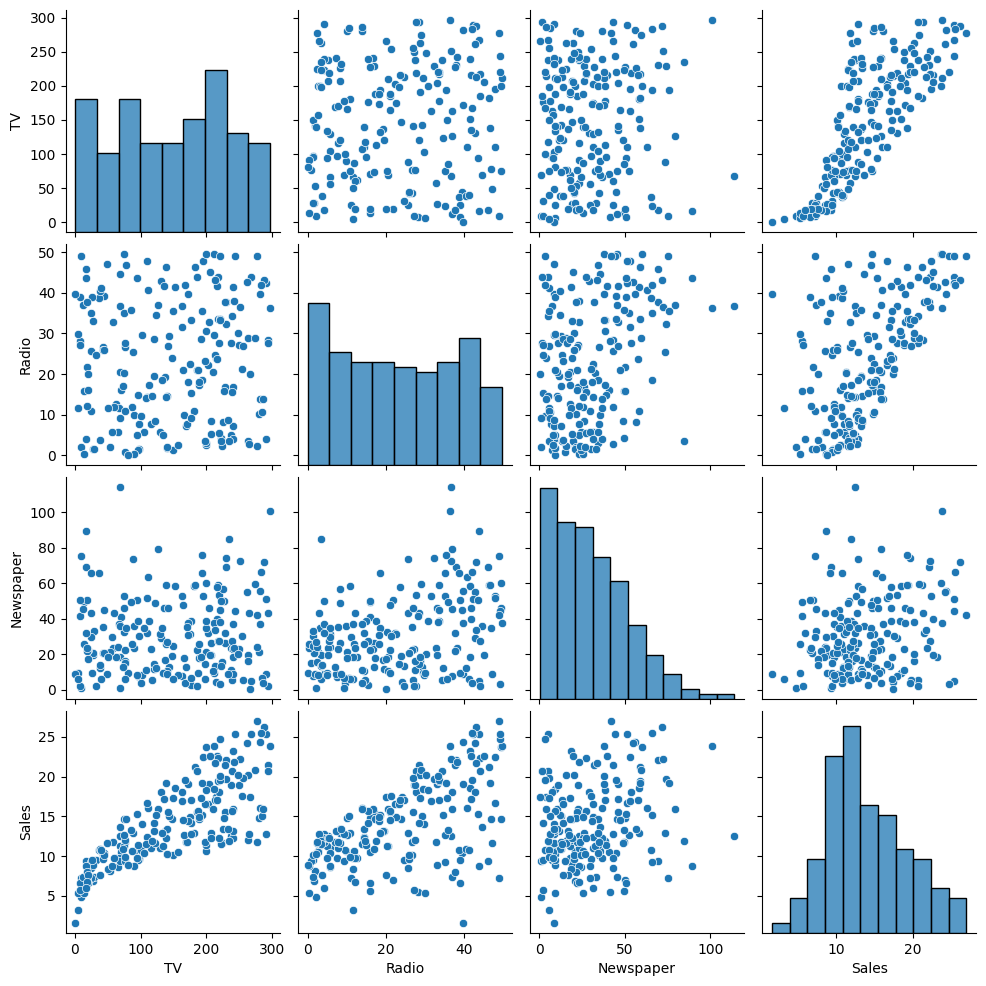

In [11]:
sns.pairplot(data)

<Axes: >

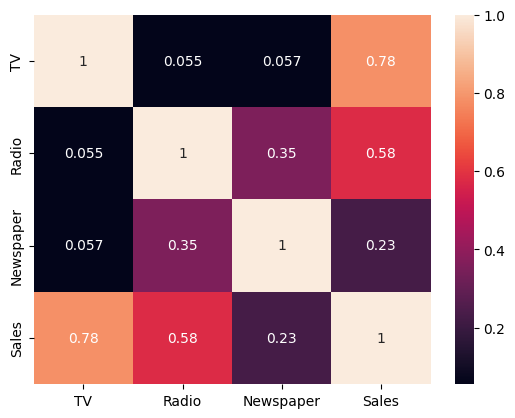

In [12]:
sns.heatmap(data.corr(),annot=True)

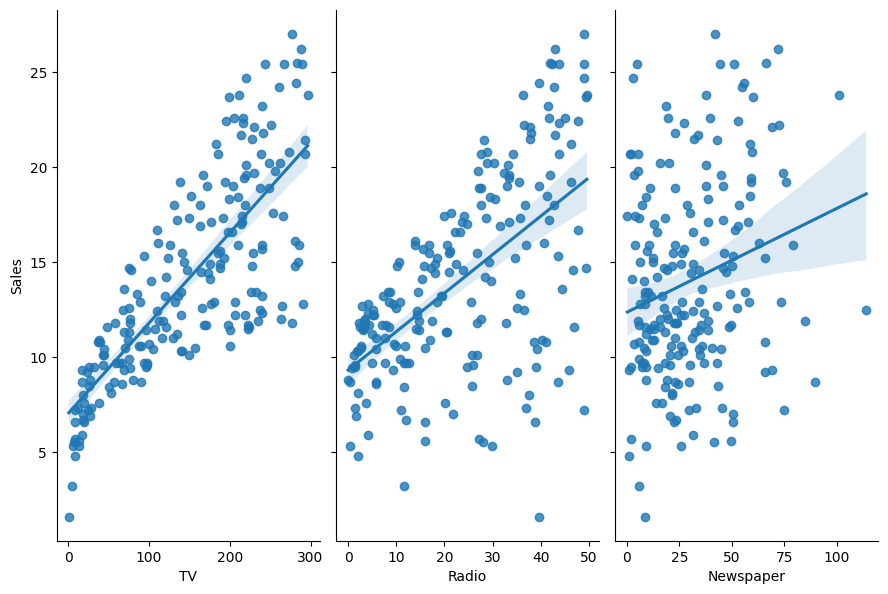

In [18]:
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', height=6,
            aspect =0.5, kind='reg')

## **Handling Outliers**

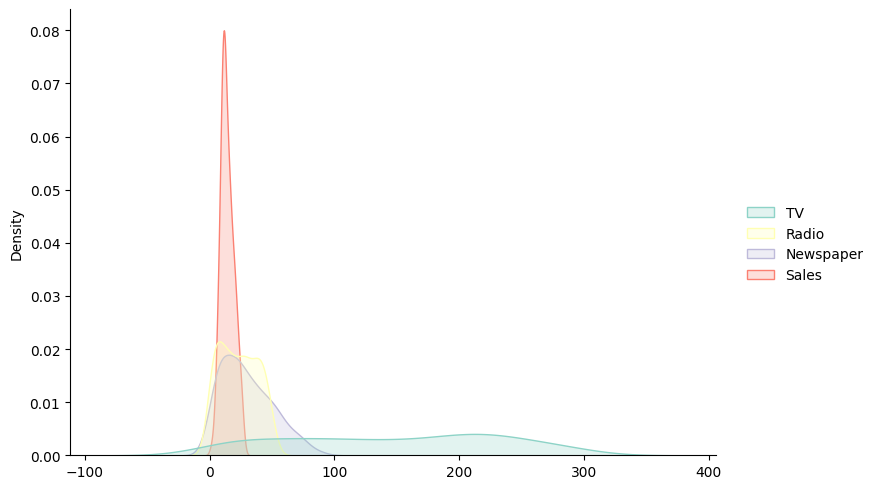

In [48]:
sns.displot(kind='kde',
            data=data,
            fill=True,
            height=5,
            aspect=1.5,
            common_norm=False,
            palette="Set3")

<Axes: >

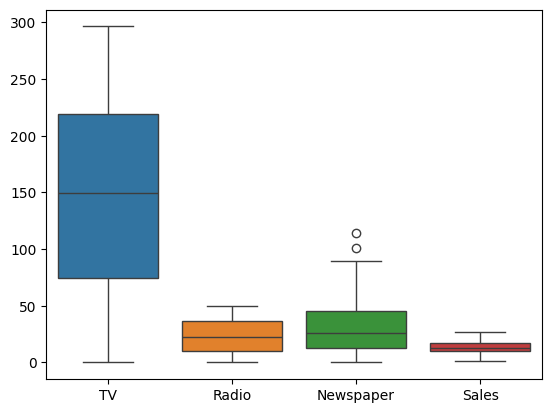

In [30]:
sns.boxplot(data)

In [31]:
Q1 = data['Newspaper'].quantile(0.25)
Q3 = data['Newspaper'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

data = data[(data['Newspaper'] >= lower_limit) & (data['Newspaper'] <= upper_limit)]

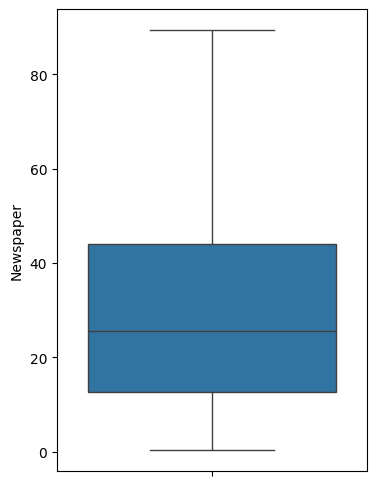

In [32]:
plt.figure(figsize=(4,6))
sns.boxplot(data['Newspaper'])
plt.show()

## **Linear Model Creating**

In [34]:
X = data.drop('Sales', axis=1)
y = data['Sales']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((158, 3), (40, 3), (158,), (40,))

In [37]:
model = LinearRegression()
reg_model = model.fit(X_train, y_train)

In [38]:
y_pred = reg_model.predict(X_test)

In [39]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
66,9.5,8.902563
116,12.2,12.013069
17,24.4,23.211445
143,10.4,8.923951
158,7.3,10.467307


## **Evulation Metrics**

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('Root Mean Squared Error:', rmse)
print('R-squared:', r2)

Mean Squared Error: 3.1740973539761033
Mean Absolute Error: 1.4607567168117603
Root Mean Squared Error: 1.78159966153345
R-squared: 0.899438024100912


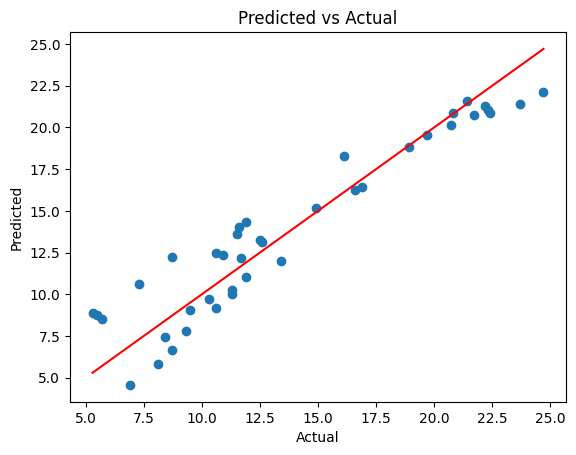

In [ ]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red') # 45 derece çizgisi
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs Actual')
plt.show()


In [ ]:
bias = reg_model.intercept_
coefficients = reg_model.coef_
print('Bias (intercept):', bias)
print('Coefficients:', coefficients)

Bias (intercept): 2.979067338122629
Coefficients: [0.04472952 0.18919505 0.00276111]


### Sales = 2.97 + 0.04xTV + 0.19xRadio + 0.002xNewspaper